Loading Data Set & Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_excel("Dataset/loan-data.xlsx" , index_col=0 )

In [3]:
df.shape

(38480, 36)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,...,1.0,0.000000,0.00,0.00,0.00,2023-01-07,0.00,2023-01-07,2023-01-07,1
3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,...,10.0,3075.291779,3075.29,2500.00,575.29,2023-07-13,90.85,2023-08-13,2023-06-16,0
4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,...,15.0,2948.760000,2948.76,1909.02,873.81,2023-11-11,175.67,NaT,2023-03-12,1
5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,...,20.0,8082.391880,8082.39,7000.00,1082.39,2023-03-14,1550.27,NaT,2023-03-14,0
6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,...,15.0,2161.663244,2161.66,2000.00,161.66,2023-02-14,53.12,NaT,2023-06-16,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38480 entries, 2 to 38480
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      38480 non-null  int64         
 1   member_id               38480 non-null  int64         
 2   loan_amnt               38479 non-null  float64       
 3   funded_amnt             38479 non-null  float64       
 4   funded_amnt_inv         38479 non-null  float64       
 5   term                    38480 non-null  object        
 6   int_rate                38480 non-null  float64       
 7   installment             38479 non-null  float64       
 8   emp_length              37487 non-null  object        
 9   home_ownership          38480 non-null  object        
 10  annual_inc              38478 non-null  float64       
 11  verification_status     38480 non-null  object        
 12  issue_d                 38480 non-null  dateti

In [6]:
df.isna().sum()

id                            0
member_id                     0
loan_amnt                     1
funded_amnt                   1
funded_amnt_inv               1
term                          0
int_rate                      0
installment                   1
emp_length                  993
home_ownership                0
annual_inc                    2
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   1
earliest_cr_line              0
inq_last_6mths                1
mths_since_last_delinq    24363
open_acc                      1
pub_rec                       1
revol_bal                     4
revol_util                   59
total_acc                     1
total_pymnt                   1
total_pymnt_inv               1
total_rec_prncp               1
total_rec_int                 1
last_pym

In [7]:
df.emp_length.unique()

array(['< 1 year', '4 years', '10+ years', nan, '3 years', '5 years',
       '7 years', '2 years', '1 year', '6 years', '9 years', '8 years'],
      dtype=object)

In [8]:
df.mths_since_last_delinq.unique()

array([ nan,  59.,   3.,  72.,  25.,  61.,  41.,  42.,  13.,  79.,  19.,
        18.,   1.,  16.,  15.,  45.,  76.,   8.,  23.,  21.,  52.,   0.,
        75.,  40.,  51.,  65.,   4.,  17.,  29.,  22.,   5.,  12.,  39.,
        33.,  49.,  78.,  58.,  69.,  24.,  64.,  10.,  31.,  68.,  14.,
        28.,  30.,   7.,  56.,  85.,  62.,  36.,  44.,  35.,  27.,  46.,
        63.,  47.,  48.,  57.,  74.,  67.,  20.,  11.,  34.,  80.,  73.,
        71.,  66.,  81.,  43.,  38.,  37.,  54.,  26.,   9.,  32.,  60.,
        77.,  55.,   2.,  50.,  53.,   6.,  70.,  82.,  86., 115.,  83.,
       103.,  96., 120.,  89.,  95., 106.])

In [9]:
df.mths_since_last_delinq.isna().sum()

24363

In [10]:
df.next_pymnt_d.unique()

array(['2023-01-07T00:00:00.000000000', '2023-08-13T00:00:00.000000000',
                                 'NaT', '2023-06-13T00:00:00.000000000',
       '2023-09-10T00:00:00.000000000', '2023-01-12T00:00:00.000000000',
       '2023-07-11T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '2023-09-13T00:00:00.000000000', '2023-11-12T00:00:00.000000000',
       '2023-02-11T00:00:00.000000000', '2023-02-12T00:00:00.000000000',
       '2023-10-08T00:00:00.000000000', '2023-08-10T00:00:00.000000000',
       '2023-07-16T00:00:00.000000000', '2023-12-10T00:00:00.000000000',
       '2023-07-12T00:00:00.000000000', '2023-05-13T00:00:00.000000000',
       '2023-11-09T00:00:00.000000000', '2023-01-10T00:00:00.000000000',
       '2023-10-09T00:00:00.000000000', '2023-04-11T00:00:00.000000000',
       '2023-02-13T00:00:00.000000000', '2023-08-09T00:00:00.000000000',
       '2023-01-13T00:00:00.000000000', '2023-11-15T00:00:00.000000000',
       '2023-09-11T00:00:00.000000000', '2023-12-11

In [11]:
df.next_pymnt_d.isna().sum()

35097

In [12]:
df.last_credit_pull_d.isna().sum()

3

In [13]:
df.repay_fail.isna().sum()

0

<AxesSubplot:>

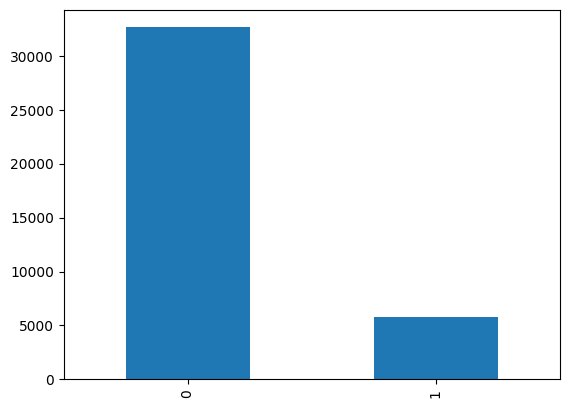

In [14]:
import matplotlib.pyplot as plt
plot_df = df.repay_fail.value_counts()
plot_df.plot(kind="bar")

In [15]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,38480.000000,664997.930016,219232.159934,1.000000,498364.500000,644319.500000,826560.750000,1077430.000000
member_id,38480.000000,826189.854288,279353.137600,1.000000,638462.000000,824254.500000,1034706.500000,1314167.000000
loan_amnt,38479.000000,11094.727644,7405.416042,0.000000,5200.000000,9750.000000,15000.000000,35000.000000
funded_amnt,38479.000000,10831.856337,7146.853682,0.000000,5100.000000,9600.000000,15000.000000,35000.000000
funded_amnt_inv,38479.000000,10150.141518,7128.026828,0.000000,4950.000000,8495.792749,14000.000000,35000.000000
int_rate,38480.000000,12.164300,3.737440,0.000000,9.620000,11.990000,14.720000,100.990000
installment,38479.000000,323.163255,209.089097,0.000000,165.740000,277.980000,429.350000,1305.190000
annual_inc,38478.000000,68995.308917,64476.388744,0.000000,40000.000000,58650.000000,82000.000000,6000000.000000
dti,38480.000000,13.378119,6.744356,0.000000,8.200000,13.485000,18.690000,100.000000
delinq_2yrs,38479.000000,0.151927,0.507592,0.000000,0.000000,0.000000,0.000000,11.000000


In [16]:
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
2,2,2,0.0,0.0,0.0,36 months,0.0,0.0,< 1 year,RENT,...,1.0,0.0,0.0,0.0,0.0,2023-01-07,0.0,2023-01-07,2023-01-07,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38480 entries, 2 to 38480
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      38480 non-null  int64         
 1   member_id               38480 non-null  int64         
 2   loan_amnt               38479 non-null  float64       
 3   funded_amnt             38479 non-null  float64       
 4   funded_amnt_inv         38479 non-null  float64       
 5   term                    38480 non-null  object        
 6   int_rate                38480 non-null  float64       
 7   installment             38479 non-null  float64       
 8   emp_length              37487 non-null  object        
 9   home_ownership          38480 non-null  object        
 10  annual_inc              38478 non-null  float64       
 11  verification_status     38480 non-null  object        
 12  issue_d                 38480 non-null  dateti

In [18]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'repay_fail'],
      dtype='object')

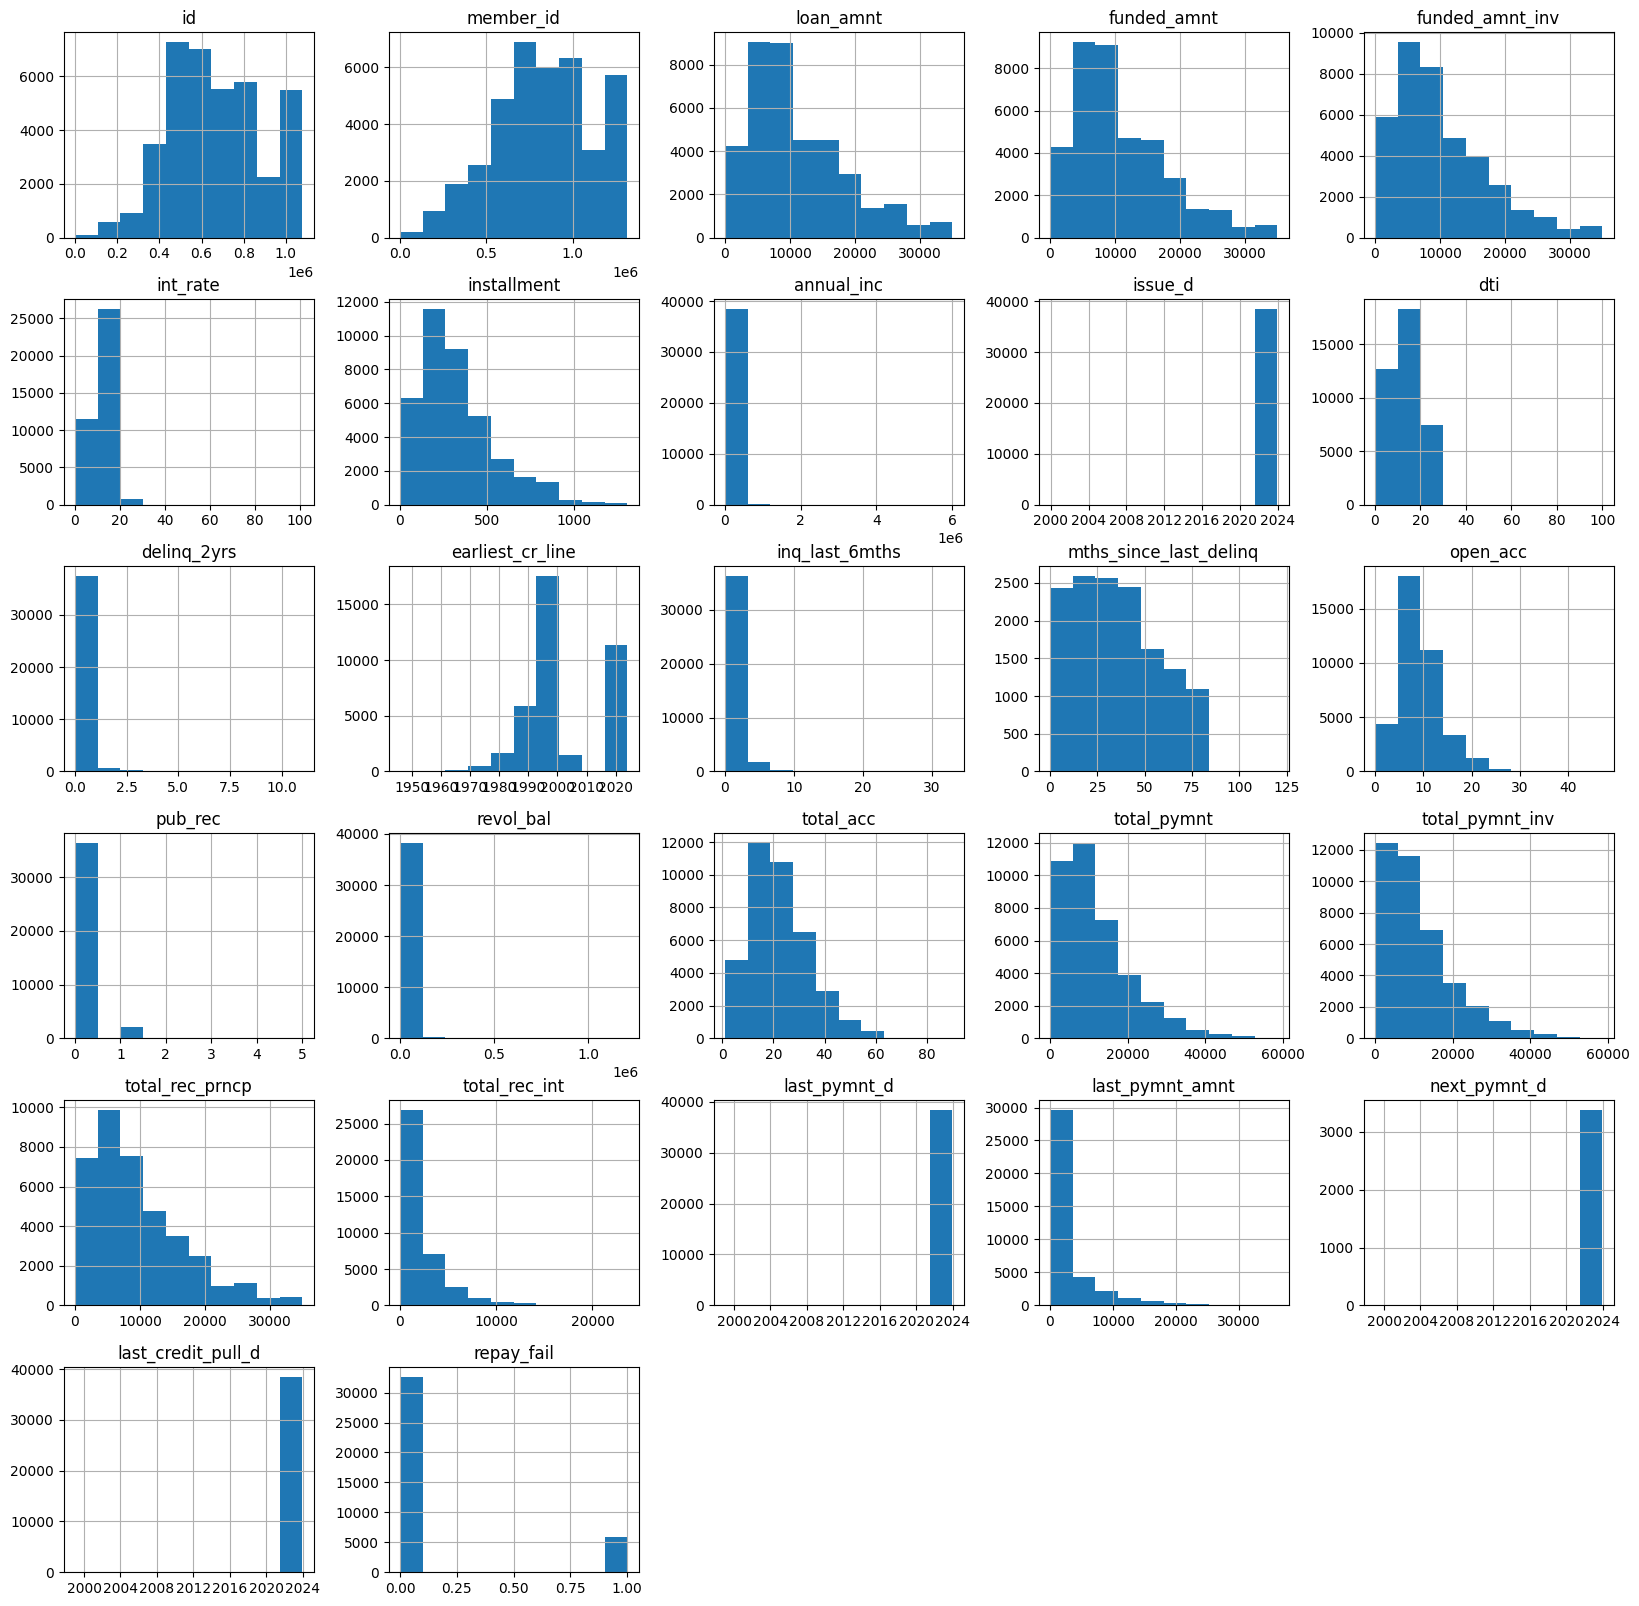

In [19]:
df.hist(figsize = (20, 20))
plt.show()

Performing EDA



In [20]:
x = df.drop(columns=['id','member_id','loan_amnt', 'funded_amnt_inv','issue_d', 
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs','earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt_inv', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'
       ])


In [21]:
x.shape

(38480, 15)

In [22]:
x.head()

,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
2,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Charged Off,major_purchase,0.000000,0.00,0.00,0.00,1
3,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Does not meet the credit policy. Status:Fully ...,other,3075.291779,2500.00,575.29,90.85,0
4,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Charged Off,debt_consolidation,2948.760000,1909.02,873.81,175.67,1
5,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Fully Paid,other,8082.391880,7000.00,1082.39,1550.27,0
6,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Fully Paid,debt_consolidation,2161.663244,2000.00,161.66,53.12,0


In [23]:
x.shape

(38480, 15)

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38480 entries, 2 to 38480
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funded_amnt          38479 non-null  float64
 1   term                 38480 non-null  object 
 2   int_rate             38480 non-null  float64
 3   installment          38479 non-null  float64
 4   emp_length           37487 non-null  object 
 5   home_ownership       38480 non-null  object 
 6   annual_inc           38478 non-null  float64
 7   verification_status  38480 non-null  object 
 8   loan_status          38480 non-null  object 
 9   purpose              38480 non-null  object 
 10  total_pymnt          38479 non-null  float64
 11  total_rec_prncp      38479 non-null  float64
 12  total_rec_int        38479 non-null  float64
 13  last_pymnt_amnt      38479 non-null  float64
 14  repay_fail           38480 non-null  int64  
dtypes: float64(8), int64(1), object(6)
m

In [25]:
x.head()

,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
2,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Charged Off,major_purchase,0.000000,0.00,0.00,0.00,1
3,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Does not meet the credit policy. Status:Fully ...,other,3075.291779,2500.00,575.29,90.85,0
4,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Charged Off,debt_consolidation,2948.760000,1909.02,873.81,175.67,1
5,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Fully Paid,other,8082.391880,7000.00,1082.39,1550.27,0
6,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Fully Paid,debt_consolidation,2161.663244,2000.00,161.66,53.12,0


In [26]:
x.isna().sum()

funded_amnt              1
term                     0
int_rate                 0
installment              1
emp_length             993
home_ownership           0
annual_inc               2
verification_status      0
loan_status              0
purpose                  0
total_pymnt              1
total_rec_prncp          1
total_rec_int            1
last_pymnt_amnt          1
repay_fail               0
dtype: int64

In [27]:
x.verification_status.unique()

array(['Not Verified', 'Verified', 'Source Verified'], dtype=object)

In [28]:
verification_status_mapping={
    'Not Verified' :  0, 
    'Verified': 1, 
    'Source Verified' :1
}
x['verification_status'] = x['verification_status'].replace(verification_status_mapping)

In [29]:
x.verification_status.unique()

array([0, 1], dtype=int64)

In [30]:
x.loan_status.unique()

array(['Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid',
       'Current', 'Does not meet the credit policy. Status:Charged Off',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Default'], dtype=object)

In [31]:
loan_status_mapping={
    'Charged Off' :  0, 
    'Fully Paid': 1, 
    'Current' :2,
    'Late ':3,
    'In Grace Period':4,
    'Default':5
    
}
x['loan_status'] = x['loan_status'].replace(loan_status_mapping)

In [32]:
x.loan_status.unique()

array([0, 'Does not meet the credit policy. Status:Fully Paid', 1, 2,
       'Does not meet the credit policy. Status:Charged Off',
       'Late (31-120 days)', 4, 'Late (16-30 days)', 5], dtype=object)

In [33]:
x.head()

,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
2,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,0,0,major_purchase,0.000000,0.00,0.00,0.00,1
3,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,0,Does not meet the credit policy. Status:Fully ...,other,3075.291779,2500.00,575.29,90.85,0
4,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,0,0,debt_consolidation,2948.760000,1909.02,873.81,175.67,1
5,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,0,1,other,8082.391880,7000.00,1082.39,1550.27,0
6,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,0,1,debt_consolidation,2161.663244,2000.00,161.66,53.12,0


In [34]:
x.purpose.unique()

array(['major_purchase', 'other', 'debt_consolidation', 'credit_card',
       'small_business', 'wedding', 'medical', 'car', 'home_improvement',
       'vacation', 'educational', 'house', 'moving', 'renewable_energy'],
      dtype=object)

In [35]:
purpose_mapping={
    'major_purchase' :  0, 
    'other': 1, 
    'debt_consolidation' :2,
    'credit_card':3,
    'small_business':4,
    'wedding':5,
    'medical':6,
    'car':7,
    'home_improvement':8,
    'vacation':9,
    'educational':10,
    'house':11,
    'moving':12,
    'renewable_energy':13
    
    
    
}
x['purpose'] = x['purpose'].replace(purpose_mapping)

In [36]:
x.purpose.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [37]:
x.emp_length.unique()


array(['< 1 year', '4 years', '10+ years', nan, '3 years', '5 years',
       '7 years', '2 years', '1 year', '6 years', '9 years', '8 years'],
      dtype=object)

In [38]:
x.term.unique()


array(['36 months', '60 months'], dtype=object)

In [39]:
x['term'] = x['term'].replace(['36 months'], 36)

In [40]:
x.term.unique()


array([36, '60 months'], dtype=object)

In [41]:
x['term'] = x['term'].replace(['60 months'], 60)

In [42]:
home_ownership_mapping={
    'RENT' :  0, 
    'MORTGAGE': 1, 
    'OWN' :2,
    'OTHER' :3,
     'NONE' :4
}
x['home_ownership'] = x['home_ownership'].replace(home_ownership_mapping)

In [43]:
x.term.unique()


array([36, 60], dtype=int64)

In [44]:
x.head(3)

,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
2,0.0,36,0.00,0.00,< 1 year,0,0.0,0,0,0,0.000000,0.00,0.00,0.00,1
3,2500.0,36,13.98,85.42,4 years,0,20004.0,0,Does not meet the credit policy. Status:Fully ...,1,3075.291779,2500.00,575.29,90.85,0
4,5000.0,36,15.95,175.67,4 years,0,59000.0,0,0,2,2948.760000,1909.02,873.81,175.67,1


In [45]:
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Use the mapping to replace the strings with integers
x['emp_length'] = x['emp_length'].replace(emp_length_mapping)

In [46]:
x.home_ownership.unique()


array([0, 1, 2, 3, 4], dtype=int64)

In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38480 entries, 2 to 38480
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funded_amnt          38479 non-null  float64
 1   term                 38480 non-null  int64  
 2   int_rate             38480 non-null  float64
 3   installment          38479 non-null  float64
 4   emp_length           37487 non-null  float64
 5   home_ownership       38480 non-null  int64  
 6   annual_inc           38478 non-null  float64
 7   verification_status  38480 non-null  int64  
 8   loan_status          38480 non-null  object 
 9   purpose              38480 non-null  int64  
 10  total_pymnt          38479 non-null  float64
 11  total_rec_prncp      38479 non-null  float64
 12  total_rec_int        38479 non-null  float64
 13  last_pymnt_amnt      38479 non-null  float64
 14  repay_fail           38480 non-null  int64  
dtypes: float64(9), int64(5), object(1)
m

In [48]:
x.isna().sum()

funded_amnt              1
term                     0
int_rate                 0
installment              1
emp_length             993
home_ownership           0
annual_inc               2
verification_status      0
loan_status              0
purpose                  0
total_pymnt              1
total_rec_prncp          1
total_rec_int            1
last_pymnt_amnt          1
repay_fail               0
dtype: int64

In [49]:
x=x[~x['funded_amnt'].isna()]

In [50]:
x=x[~x['annual_inc'].isna()]

In [51]:
x=x[~x['emp_length'].isna()]

In [52]:
x.isna().sum()

funded_amnt            0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
total_pymnt            0
total_rec_prncp        0
total_rec_int          0
last_pymnt_amnt        0
repay_fail             0
dtype: int64

In [53]:
class_count_0 , class_count_1 = x['repay_fail'].value_counts()
class_0 = x[x['repay_fail']==0].sample(5609)
class_1 = x[x['repay_fail']==1]

balance_data = pd.concat([class_0 , class_1])

In [54]:
X = balance_data.drop('repay_fail',axis=1)
y = balance_data['repay_fail']
y

25511    0
21594    0
3945     0
37080    0
4301     0
        ..
38455    1
38457    1
38459    1
38472    1
38475    1
Name: repay_fail, Length: 11218, dtype: int64

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [56]:
y.value_counts()

0    5609
1    5609
Name: repay_fail, dtype: int64

In [57]:
X_train

,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt
21334,10000.0,36,8.90,317.54,6.0,1,60000.0,0,1,8,11431.116130,10000.00,1431.12,324.06
6671,4500.0,36,15.70,157.55,1.0,1,42450.0,0,Does not meet the credit policy. Status:Charge...,10,4836.490000,3594.62,1131.59,157.55
29941,4000.0,36,12.18,133.20,3.0,0,110000.0,0,1,1,4795.398246,4000.00,795.40,139.75
35020,13750.0,36,13.98,469.81,2.0,1,46996.0,0,1,2,14928.118980,13750.00,1178.12,11647.46
13911,15250.0,60,19.04,395.93,10.0,1,76000.0,1,0,2,8747.740000,3859.46,4848.88,396.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,5000.0,36,6.54,153.34,1.0,0,60000.0,0,0,4,3970.000000,3362.87,468.64,153.34
9893,1000.0,36,5.42,30.16,10.0,1,135600.0,0,1,0,1062.618168,1000.00,62.62,297.21
612,2400.0,36,16.32,84.76,3.0,1,126000.0,0,1,8,3039.006575,2400.00,639.01,228.69
32822,12000.0,36,7.29,372.12,9.0,1,61000.0,1,1,3,13396.253670,12000.00,1396.25,386.74


Data Visualization



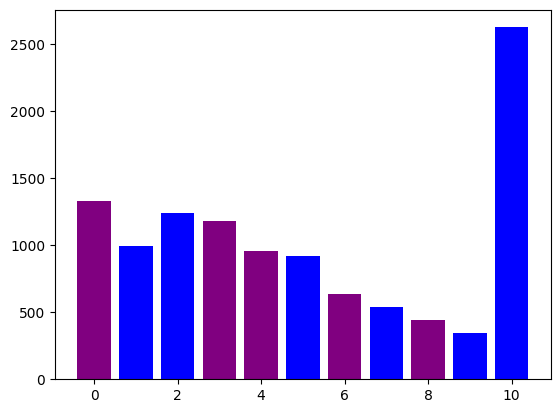

In [58]:
plt.bar(list(X['emp_length'].value_counts().keys()),list(X['emp_length'].value_counts()),color = ['Blue','purple'])
plt.show()

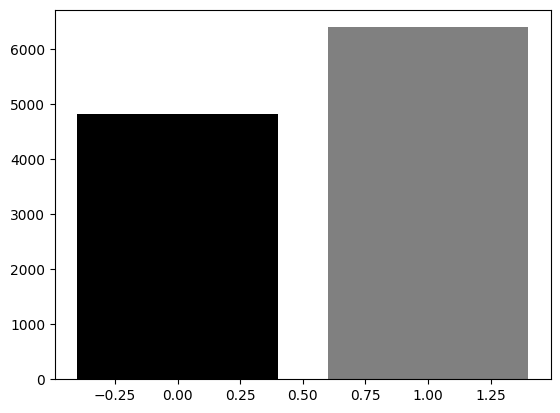

In [59]:
plt.bar(list(X['verification_status'].value_counts().keys()),list(X['verification_status'].value_counts()),color = ['gray','black'])
plt.show()

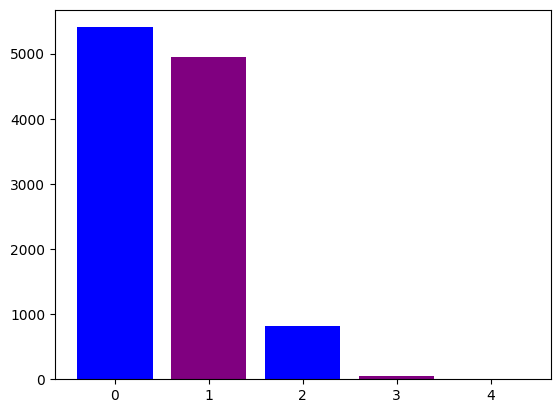

In [60]:
plt.bar(list(X['home_ownership'].value_counts().keys()),list(X['home_ownership'].value_counts()),color = ['Blue','purple'])
plt.show()

# Making Column Transformer

In [80]:
# one hot encoding
# cat =[7,8,9]
# trf1  = ColumnTransformer([
#     ("onehot_categorical", OneHotEncoder(sparse=False, handle_unknown='ignore'),cat )],
#     remainder= "passthrough")

In [81]:
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

In [82]:
trf3 = DecisionTreeClassifier()

In [83]:
X_train.head()

,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt
21334,10000.0,36,8.90,317.54,6.0,1,60000.0,0,1,8,11431.116130,10000.00,1431.12,324.06
6671,4500.0,36,15.70,157.55,1.0,1,42450.0,0,Does not meet the credit policy. Status:Charge...,10,4836.490000,3594.62,1131.59,157.55
29941,4000.0,36,12.18,133.20,3.0,0,110000.0,0,1,1,4795.398246,4000.00,795.40,139.75
35020,13750.0,36,13.98,469.81,2.0,1,46996.0,0,1,2,14928.118980,13750.00,1178.12,11647.46
13911,15250.0,60,19.04,395.93,10.0,1,76000.0,1,0,2,8747.740000,3859.46,4848.88,396.33


In [84]:
pipe = Pipeline([
              # ('trf1',trf1),
                ('trf2',trf2),
                ('trf3',trf3)
            ])

In [85]:
pipe.fit(X_train,y_train)

ValueError: could not convert string to float: 'Does not meet the credit policy. Status:Charged Off'

In [ ]:
from sklearn import set_config
set_config(display="diagram")
pipe

Pipeline(memory=None,
         steps=[('trf1',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehot_categorical',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [7, 8, 9])],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('trf2',
                 Colu...
                                                               feature_range=(0,
                                                                              1)),
                                                  slice(0, 10, None))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('trf3',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=None, splitter='best'))],
         verbose=False)

In [ ]:
y_pred = pipe.predict(X_train)
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

1.0

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1164
           1       1.00      1.00      1.00      1080

    accuracy                           1.00      2244
   macro avg       1.00      1.00      1.00      2244
weighted avg       1.00      1.00      1.00      2244



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1164    0]
 [   0 1080]]


In [87]:
from pycaret.classification import setup
from pycaret.classification import compare_models

In [88]:
grid = setup(data=x, target=x.columns[-1])
grid

,Description,Value
0,Session id,8902
1,Target,repay_fail
2,Target type,Binary
3,Original data shape,"(37485, 15)"
4,Transformed data shape,"(37485, 23)"
5,Transformed train set shape,"(26239, 23)"
6,Transformed test set shape,"(11246, 23)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True


In [89]:
best = compare_models()

In [ ]:
best

[]

In [ ]:
from autokeras import StructuredDataClassifier

In [ ]:
search = StructuredDataClassifier(max_trials=15)

INFO:tensorflow:Reloading Tuner from .\structured_data_classifier\tuner0.json


INFO:tensorflow:Reloading Tuner from .\structured_data_classifier\tuner0.json


In [ ]:
#search.fit(x=X_train, y=y_train, verbose=0)

In [ ]:
X.shape

(157052, 1)

In [ ]:
X = np.asarray(X).astype(np.float32)
y= np.asarray(y).astype(np.float32)

In [ ]:
from keras.models import Sequential 
from keras.layers import Activation, Dense 

model = Sequential() 
model.add(Dense(64, activation = 'linear', input_shape = (1,)))
model.add(layers.Dense(2, activation='sigmoid'))

In [ ]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(X, y, epochs=5, batch_size=128)

ValueError: Data cardinality is ambiguous:
  x sizes: 157052
  y sizes: 11218
Make sure all arrays contain the same number of samples.